# Yahoo! News Scraper

In [1]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

#### Setup the url template and request headers

In [2]:
template = 'https://news.search.yahoo.com/search?p={}'

In [3]:
url = template.format('iphone 12 leaked')

In [4]:
url

'https://news.search.yahoo.com/search?p=iphone 12 leaked'

In [5]:
headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'
}

#### Get the collection of articles

In [6]:
response = requests.get(url, headers=headers)

In [7]:
response

<Response [200]>

In [8]:
soup = BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE html>
<html class="NoJs" id="atomic" lang="en-US"><head><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_76.min.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_114.min.png" rel="apple-touch-icon" sizes="114x114"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_120.min.png" rel="apple-touch-icon" sizes="120x120"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"><noscript><meta content="0;url=https://news.search.yahoo.com/search?p=iphone+12+leaked&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/></noscript><script nonce="LrqJa+vYxFeEFQjzVrPfzQ==" type="text/javascript">!function(o){"use strict";var L=o.YAHOO=o.YAHOO||{};L.ULT||(L.ULT={}),L.ULT.SRC_SPACEID_KEY="_S"
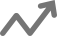
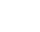
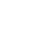

In [9]:
print(soup)

In [10]:
cards = soup.find_all('div', 'NewsArticle')

In [11]:
cards

[<div class="dd NewsArticle" data-c66="665e7e09ce5e6"><ul class="compArticleList"><li class="ov-a fst"><a class="thmb" href="https://r.search.yahoo.com/_ylt=Awrg1QIJfl5m4pgpeKnQtDMD;_ylu=Y29sbwNncTEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1717497481/RO=10/RU=https%3a%2f%2fwww.yahoo.com%2ftech%2fiphone-16-pro-price-release-105824257.html/RK=2/RS=5TY1wHsfgKB3Uux7z_4WNAFVZuw-" referrerpolicy="unsafe-url" target="_blank" title="iPhone 16 Pro: price and release date rumours, leaked photos and what to expect"><img alt="iPhone 16 Pro: price and release date rumours, leaked photos and what to expect" class="s-img" height="92" src="https://s.yimg.com/fz/api/res/1.2/hfS0y0E9AEqiSnZX_zEuKA--~C/YXBwaWQ9c3JjaGRkO2ZpPWZpbGw7aD05MjtweG9mZj0wO3B5b2ZmPTA7cT04MDtzbT0xO3c9MTY0/https://media.zenfs.com/en/what_hi_fi_263/f4870d57779803b6b41b979e3f0cc4bb" title="iPhone 16 Pro: price and release date rumours, leaked photos and what to expect" width="164"/></a><h4 class="s-title fz-16 lh-20"><a href="https://r.search

In [12]:
len(cards)

10

#### Create a prototype model for extracting article data

In [13]:
card = cards[5]

In [14]:
card

<div class="dd NewsArticle" data-c66="665e7e09cf111"><ul class="compArticleList"><li class="ov-a fst"><a class="thmb" href="https://r.search.yahoo.com/_ylt=Awrg1QIJfl5m4pgpgKnQtDMD;_ylu=Y29sbwNncTEEcG9zAzYEdnRpZAMEc2VjA3Ny/RV=2/RE=1717497481/RO=10/RU=https%3a%2f%2fwww.yahoo.com%2ftech%2famazon-deals-shop-todays-best-150129553.html/RK=2/RS=0XICzlvrxMpao6JLo_lOHCyA2TY-" referrerpolicy="unsafe-url" target="_blank" title="Amazon deals: Shop today's best savings on Stanley, Google, and DeWalt"><img alt="Amazon deals: Shop today's best savings on Stanley, Google, and DeWalt" class="s-img s-img-ll" data-src="https://s.yimg.com/fz/api/res/1.2/px.S13x9wY2_IOdZ2ee3Og--~C/YXBwaWQ9c3JjaGRkO2ZpPWZpbGw7aD05MjtweG9mZj0wO3B5b2ZmPTA7cT04MDtzbT0xO3c9MTY0/https://media.zenfs.com/en/reviewed_ecomm_articles_907/70659cedf6a6cd1ff47fa4819de9a55a" height="92" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" title="Amazon deals: Shop today's best savings on Stanley, Google, 

In [15]:
headline = card.find('h4', 's-title').text
headline

"Amazon deals: Shop today's best savings on Stanley, Google, and DeWalt"

In [16]:
source = card.find("span", 's-source').text
source

'Reviewed via Yahoo News'

In [17]:
posted = card.find('span', 's-time').text.replace('·', '').strip()
posted

'13 hours ago'

In [18]:
description = card.find('p', 's-desc').text.strip()
print(description)

iPhone users who've never had a smartwatch will appreciate the SE's seamless smartphone integration....


The url needs a little more cleaning... the original URL is hiding inside the Yahoo! News link

In [19]:
raw_link = card.find('a').get('href')
raw_link

'https://r.search.yahoo.com/_ylt=Awrg1QIJfl5m4pgpgKnQtDMD;_ylu=Y29sbwNncTEEcG9zAzYEdnRpZAMEc2VjA3Ny/RV=2/RE=1717497481/RO=10/RU=https%3a%2f%2fwww.yahoo.com%2ftech%2famazon-deals-shop-todays-best-150129553.html/RK=2/RS=0XICzlvrxMpao6JLo_lOHCyA2TY-'

In [20]:
unquoted_link = requests.utils.unquote(raw_link)
unquoted_link

'https://r.search.yahoo.com/_ylt=Awrg1QIJfl5m4pgpgKnQtDMD;_ylu=Y29sbwNncTEEcG9zAzYEdnRpZAMEc2VjA3Ny/RV=2/RE=1717497481/RO=10/RU=https://www.yahoo.com/tech/amazon-deals-shop-todays-best-150129553.html/RK=2/RS=0XICzlvrxMpao6JLo_lOHCyA2TY-'

In [21]:
pattern = re.compile(r'RU=(.+)\/RK')
clean_link = re.search(pattern, unquoted_link).group(1)
clean_link

'https://www.yahoo.com/tech/amazon-deals-shop-todays-best-150129553.html'

#### Generalize the model

In [22]:
def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

In [23]:
articles = []
links = set()

for card in cards:
    article = get_article(card)
    link = article[-1]
    if not link in links:
        links.add(link)
        articles.append(article)

In [24]:
articles[:5]

[('iPhone 16 Pro: price and release date rumours, leaked photos and what to expect',
  'What Hi-Fi? via Yahoo News',
  '16 hours ago',
  "That's when Apple has launched almost every iPhone since the iPhone 5 in 2012 (bar the iPhone X,...",
  'https://www.yahoo.com/tech/iphone-16-pro-price-release-105824257.html'),
 ('iPhone 16: Get the Inside Scoop on the Most Credible Apple Rumors',
  'CNET',
  '4 days ago',
  "It's been more than eight months since the iPhone 15 launched, and as Apple's Worldwide Developers...",
  'https://www.cnet.com/tech/mobile/iphone-16-get-the-inside-scoop-on-the-most-credible-apple-rumors/'),
 ('OnePlus 13 leak reveals missing feature but there’s a silver lining - Dexerto',
  'Dexerto',
  '12 hours ago',
  'The OnePlus 13 might not give you the option to charge the phone wirelessly, as a popular tipster...',
  'https://www.dexerto.com/tech/oneplus-13-leak-reveals-missing-feature-but-theres-a-silver-lining-2756731/'),
 ('Leaked iPhone 16 Pro Cases Show Huge Came

In [27]:
articles[0][3]

"That's when Apple has launched almost every iPhone since the iPhone 5 in 2012 (bar the iPhone X,..."

#### Get the next page

In [28]:
url = soup.find('a', 'next').get('href')
url

'https://news.search.yahoo.com/search;_ylt=Awrg1QIJfl5m4pgpjanQtDMD;_ylu=Y29sbwNncTEEcG9zAzEEdnRpZAMEc2VjA3BhZ2luYXRpb24-?p=iphone+12+leaked&b=11&pz=10&bct=0&xargs=0'

#### Bringing it all together

In [ ]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

def get_the_news(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)
        
    return articles

In [ ]:
articles = get_the_news('iphone 12 leaked')

In [ ]:
articles[:5]

[('iPhone 12 and iPhone 12 Pro: Everything we know about Apple’s new phones',
  'Digital Trends via Yahoo Finance',
  '11 hours ago',
  'This year, it’s going to be the latter — considering Apple’s September 15 hardware event has come...',
  'https://finance.yahoo.com/news/iphone-12-coming-fall-everything-185615475.html'),
 ('iPhone 12 Mini, iPhone 12 And iPhone 12 Pro Storage Configurations Leaked',
  'International Business Times',
  '14 hours ago',
  "Rumors about Apple's upcoming iPhone 12 series handsets abound as the Cupertino tech giant has yet...",
  'https://www.ibtimes.com/iphone-12-mini-iphone-12-iphone-12-pro-storage-configurations-leaked-3054361'),
 ('The first iPhone 12 models to launch next month just leaked',
  'BGR',
  '2 days ago',
  'The first iPhone 12 versions to launch in stores in October might be the cheapest models, according...',
  'https://bgr.com/2020/09/29/iphone-12-release-date-models-apple-event-october-13th-rumor/'),
 ('Apple Accident Confirms New iPhone